# 

In [1]:
#importing python libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [2]:
#fetch images from folders
count =0
dirs=os.listdir('flowers/')
for dir in dirs:
    files=list(os.listdir('flowers/'+dir))
    print(dir + " Folder has " + str(len(files)) + " Images ")
    count= count + len(files)
print("flowers folder has " + str(count) + " Images ")    
               

daisy Folder has 764 Images 
dandelion Folder has 1052 Images 
rose Folder has 784 Images 
sunflower Folder has 733 Images 
tulip Folder has 984 Images 
flowers folder has 4317 Images 


In [3]:
base_dir='flowers/'
img_size=180
batch=32

In [4]:
#Load images into arrarys
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,
                                                       validation_split=0.2,
                                                       subset='training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,
                                                       validation_split=0.2,
                                                       subset='validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))
                                                                                                              
                                                       

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
flower_names = train_ds.class_names
flower_names


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [6]:
import matplotlib.pyplot as plt

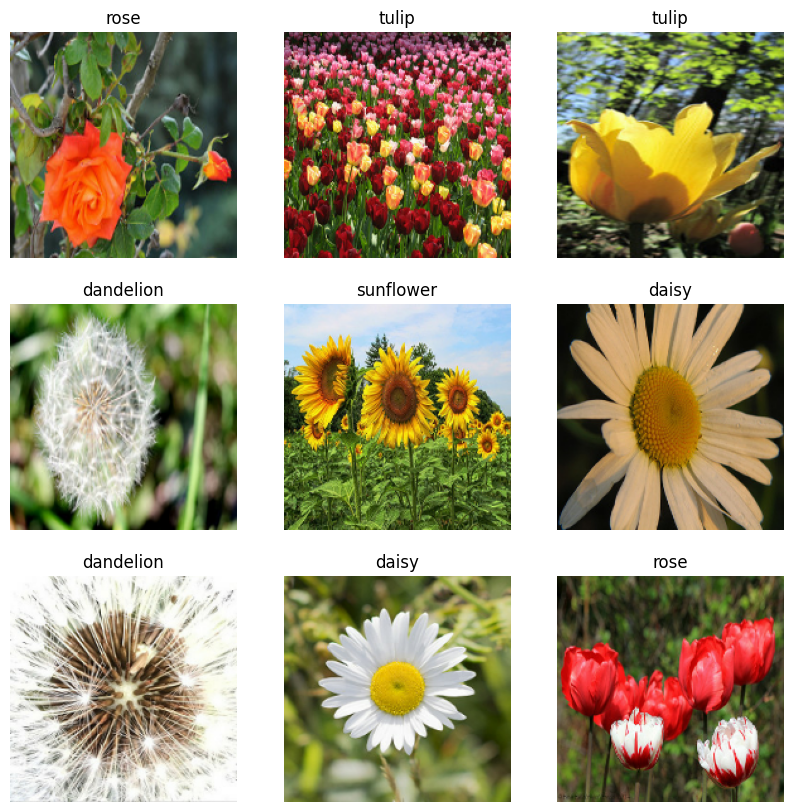

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images , labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
#Data augmentation

data_augmentation = Sequential([
    layers.RandomFlip("horizontal" , input_shape=(img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

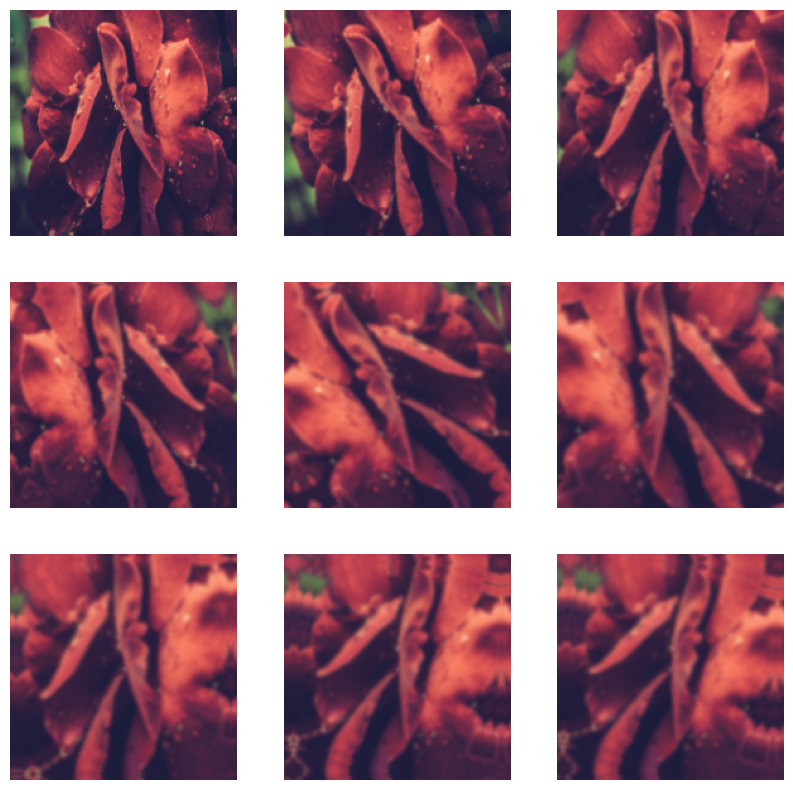

In [12]:
i = 0
plt.figure(figsize=(10,10))

for images , labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        
        plt.axis('off')

In [13]:
#Model training

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16 , 3 , padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32 , 3 , padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64 , 3 , padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(5)
])

In [14]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [16]:
history = model.fit(train_ds,epochs=2,validation_data=val_ds)

Epoch 1/2
 25/108 [=====>........................] - ETA: 1:57 - loss: 1.6526 - accuracy: 0.2825

KeyboardInterrupt: 

In [17]:
def classify_images(image_path):
    input_image =tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array=tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim=tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome =' The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome 


In [17]:
classify_images('sample/Rose.jpeg')

NameError: name 'classify_images' is not defined

In [19]:
model.save('Parag_classify_flowers_images.h5')